**CA04 Ensemble Models** - BSAN 6070

Sarah Olsen✌

**PART 1**
 
*1.  Data Source and Contents*

This dataset is obtained from the Census Bureau and represents salaries of people along with seven demographic variables. The following is a description of the dataset: 
*   Number of target classes: 2 ('>50K' and '<=50K') [ Labels: 1, 0 ] 
*   Number of attributes (Columns): 7 
*   Number of instances (Rows): 48,842

Using a test set and training set, predetermined by the data in the 'flag' column, we will apply a decision tree algorithm using the seven attributes to predict whether a person's salary is above or below 50k.

For this predictive model, discrete variables makes more sense than the exact numerical values on a scale. That is why the continuous data columns have already been transformed into predetermined data groups/data blocks using the binning/discretization technique.

In [ ]:
#Import some useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import accuracy_score

#Read in the dataset from Github
data = pd.read_csv('https://github.com/ArinB/MSBA-CA-Data/blob/main/CA03/census_data.csv?raw=true')

#Check the first few rows
data.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


**PART 2**
 
*1.  Finding Optimal Value of a key Hyper-parameter*

For Ensemble Models, one of the key hyper-parameter is number of “estimators". Following is an example of fining the optimal value of “Maximum Depth”. Review the following code snippet to understand how the optimal value of this hyper-parameter (Max Depth = 10) is found by plotting a graph.


**PART 3**
 
*3.  Building a Random Forest Model*

Train a Random Forest Model. Using similar approach of Section 2 above, plot a graph of Accuracy vs. n_estimator. Use n_estimator values as [50,100,150,200,250,300,350,400,450,500].

In [ ]:
# Make a list of the input variables
columns = ['hours_per_week_bin',	'occupation_bin',	'msr_bin',	'capital_gl_bin',	'race_sex_bin',	'education_num_bin',	'education_bin',	'workclass_bin',	'age_bin']

In [ ]:
# Create training and test sets (split the data)
data_training = data[data['flag']=='train']
data_test = data[data['flag']=='test']
x_train = pd.get_dummies(data_training[columns])
y_train = data_training['y']
x_test = pd.get_dummies(data_test[columns])
y_test = data_test['y']

# Check the shape of each dataframe
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(32561, 36) (16281, 36) (32561,) (16281,)


In [ ]:
# Reset column names to remove the special symbols [<>,], as these characters will cause errors later in this program
x_train.columns = range(x_train.columns.size)
x_test.columns = range(x_test.columns.size)

In [ ]:
# Create the n_estimator values list to cycle through in each model
n_estimator_values = [50,100,150,200,250,300,350,400,450,500]

Text(0.5, 1.0, 'Accuracy vs n_estimators Value')

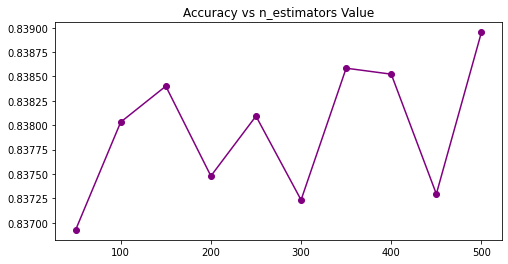

In [ ]:
# Create empty set to use for plotting accuracy vs n_estimator
results = []

# Define the random forest model
for trees in n_estimator_values:
  model = RandomForestClassifier(n_estimators = trees)
  # Fit the model on the whole dataset
  model.fit(x_train, y_train)
  # Predict the outcomes y of the test data using the x inputs
  y_pred = model.predict(x_test)
  # Calculate the accuracy score of the model
  accuracy = np.mean(y_test==y_pred)
  # Append the accuracy score to the list of accuracy scores corresponding to this n_estimators value in n_estimator_values
  results.append(accuracy)

# Plot the graph of accuracy vs n_estimator
plt.figure(figsize=(8,4))
pd.Series(results, n_estimator_values).plot(color='purple', marker='o')
plt.title('Accuracy vs n_estimators Value')

**Question 3.1**

*Write your observations about the Classifier’s behavior with respect to the number of estimators.*

It seems that the higher the value of the n_estimator, the more accurate the model is. Even though the model is accurately predicting, that doesn't necessarily mean that the model is the best model. I would want to look at the AUC and other measures to make sure that there's no classification imbalance in the training data affecting the usefulness of the model.

**Question 3.2**

*Is there an optimal value of the estimator within the given range?*

At first glance, the best model has an n_estimator value of 450 with an accuracy score of about 0.84 or 84%. This n_estimator produces the highest accuracy, but that doesn't mean it is explainable or useful. I would need to look at other measures of accuracy.


**PART 4**
 
*Building AdaBoost, Gradient Boost (classifier) and XGB Model*

***1. Building AdaBoost Model***

Train the model and plot a graph of Accuracy vs. n_estimator. Use n_estimator values as [50,100,150,200,250,300,350,400,450,500].

Text(0.5, 1.0, 'Accuracy vs n_estimators Value')

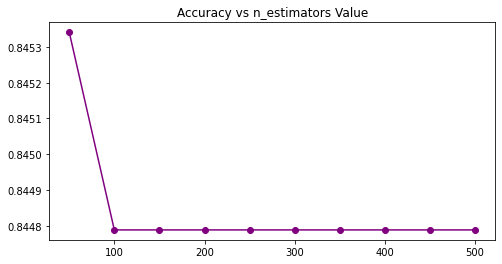

In [ ]:
# Create empty set to use for plotting accuracy vs n_estimator
results = []

# Define the AdaBoost model
for trees in n_estimator_values:
  model = AdaBoostClassifier(n_estimators = trees)
  # Fit the model on the whole dataset
  model.fit(x_train, y_train)
  # Predict the outcomes y of the test data using the x inputs
  y_pred = model.predict(x_test)
  # Calculate the accuracy score of the model
  accuracy = np.mean(y_test==y_pred)
  # Append the accuracy score to the list of accuracy scores corresponding to this n_estimators value in n_estimator_values
  results.append(accuracy)

# Plot the graph of accuracy vs n_estimator
plt.figure(figsize=(8,4))
pd.Series(results, n_estimator_values).plot(color='purple', marker='o')
plt.title('Accuracy vs n_estimators Value')

**Question 4.1.2**

*Write your observations about the Classifier’s behavior with respect to the number of estimators.*

The lowest value of the n_estimator, the more accurate the model is. The values for n_estimator >= 100 are significantly less accurate. This is strange because usually with a higher amount of trees, the more accurate a model is expected perform.

**Question 4.1.3**

*Is there an optimal value of the estimator within the given range?*

Yes, it is easy to see that the optimal estimator is 50.

***2. Building Gradient Boost (classifier)***

Train the model and plot a graph of Accuracy vs. n_estimator. Use n_estimator values as [50,100,150,200,250,300,350,400,450,500].

Text(0.5, 1.0, 'Accuracy vs n_estimators Value')

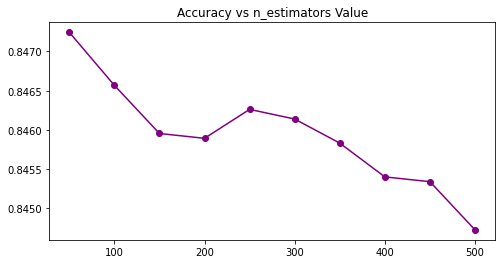

In [ ]:
# Create empty set to use for plotting accuracy vs n_estimator
results = []

# Define the AdaBoost model
for trees in n_estimator_values:
  model = GradientBoostingClassifier(n_estimators = trees)
  # Fit the model on the whole dataset
  model.fit(x_train, y_train)
  # Predict the outcomes y of the test data using the x inputs
  y_pred = model.predict(x_test)
  # Calculate the accuracy score of the model
  accuracy = np.mean(y_test==y_pred)
  # Append the accuracy score to the list of accuracy scores corresponding to this n_estimators value in n_estimator_values
  results.append(accuracy)

# Plot the graph of accuracy vs n_estimator
plt.figure(figsize=(8,4))
pd.Series(results, n_estimator_values).plot(color='purple', marker='o')
plt.title('Accuracy vs n_estimators Value')

**Question 4.2.2**

*Write your observations about the Classifier’s behavior with respect to the number of estimators.*

This model is behaving the opposite of what is expected. The higher the amount of trees, the lower the accuracy of the model.

**Question 4.2.3**

*Is there an optimal value of the estimator within the given range?*

Yes, similar to the AdaBoost model, the optimal estimator for the Gradient Boost model is 50.

***3. Building XGB Model***

Train the model and plot a graph of Accuracy vs. n_estimator. Use n_estimator values as [50,100,150,200,250,300,350,400,450,500].

Text(0.5, 1.0, 'Accuracy vs n_estimators Value')

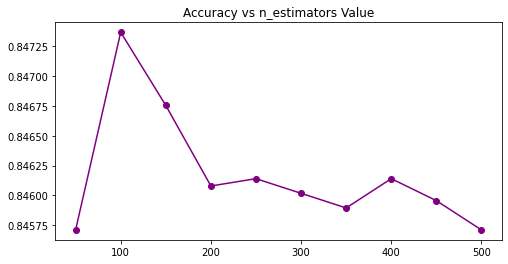

In [ ]:
# Create empty set to use for plotting accuracy vs n_estimator
results = []

# Define the AdaBoost model
for trees in n_estimator_values:
  model = xgb.XGBClassifier(n_estimators = trees)
  # Fit the model on the whole dataset
  model.fit(x_train, y_train)
  # Predict the outcomes y of the test data using the x inputs
  y_pred = model.predict(x_test)
  # Calculate the accuracy score of the model
  accuracy = np.mean(y_test==y_pred)
  # Append the accuracy score to the list of accuracy scores corresponding to this n_estimators value in n_estimator_values
  results.append(accuracy)

# Plot the graph of accuracy vs n_estimator
plt.figure(figsize=(8,4))
pd.Series(results, n_estimator_values).plot(color='purple', marker='o')
plt.title('Accuracy vs n_estimators Value')

**Question 4.3.2**

*Write your observations about the Classifier’s behavior with respect to the number of estimators.*

This model has a spike in accuracy at 100 estimators. The accuracy slowly decreases as the amount of trees increases.

**Question 4.3.3**

*Is there an optimal value of the estimator within the given range?*

Yes, the optimal estimator for the Extreme Gradient Boost model is 100.

**PART 5**
 
*3. Compare Performance *

Keep all common Hyper-parameters same for four models (Random Forest, AdaBoost, 
Gradient Boost, XGB), run them again and create a performance comparison table 
within your code and print the same as follows:

In [ ]:
from sklearn.metrics import roc_auc_score
from tabulate import tabulate

# Create a results set
results = [['Model', 'Accuracy', 'ROC AUC']]

# Create the models
rf_model = RandomForestClassifier(n_estimators = 100, random_state=1)
adab_model = AdaBoostClassifier(n_estimators = 100, random_state=1)
gb_model = GradientBoostingClassifier(n_estimators = 100, random_state=1)
xgb_model = xgb.XGBClassifier(n_estimators = 100, random_state=1)

# Create a list of models to loop through
models = rf_model, adab_model, gb_model, xgb_model

# Loop through the models
for i in models:
  model = i
  # Fit the model on the whole dataset
  model.fit(x_train, y_train)
  # Predict the outcomes y of the test data using the x inputs
  y_pred = model.predict(x_test)
  # Calculate the accuracy score of the model
  accuracy = np.mean(y_test==y_pred)
  # Calculate the roc auc score of the model
  auc_score = metrics.roc_auc_score(y_test, y_pred)
  # Append the accuracy and auc scores to the list
  results.append([i, accuracy, auc_score])

# Format the results in a table
print(tabulate(results))

----------------------------------------------------  ------------------  ------------------
Model                                                 Accuracy            ROC AUC
RandomForestClassifier(random_state=1)                0.8369879000061421  0.7470970105390464
AdaBoostClassifier(n_estimators=100, random_state=1)  0.8447884036607088  0.7460076328264228
GradientBoostingClassifier(random_state=1)            0.8465696210306493  0.7548961620708495
XGBClassifier(random_state=1)                         0.8473680977826915  0.7540719385108337
----------------------------------------------------  ------------------  ------------------
